## <font color='bLue'> IMPORTING REQUIRED LIBRARIES </font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
# to silence the warnings

## <font color = "Blue"> IMPORTING DATASET </font>

In [2]:
df_data = pd.read_csv("D:\\Rahul_Singh\\DATA_ANALYTICS\\Customer Segmentation\\Mall_Customers.csv")

In [3]:
# taking a quick look on data
df_data.head(10)
# it contains one categorical field and four numerical field

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df_data.shape
# it contains total 200 records

(200, 5)

## <font color = "blue">EXPLORATORY DATA ANALYSIS </font>

##  <font color = "blue"> UNIVARIATE ANALYSIS </font>

In [5]:
# analyzing the basic statistics of data
df_data.describe()
# Average age is around 39 years with minimum and maximum age 18 and 70 respectively
# Average annual income is 60 k$ with minimum and maximum income from 15 to 137 k$
# Spending score ranges from 1 to 100 with average round about 50

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

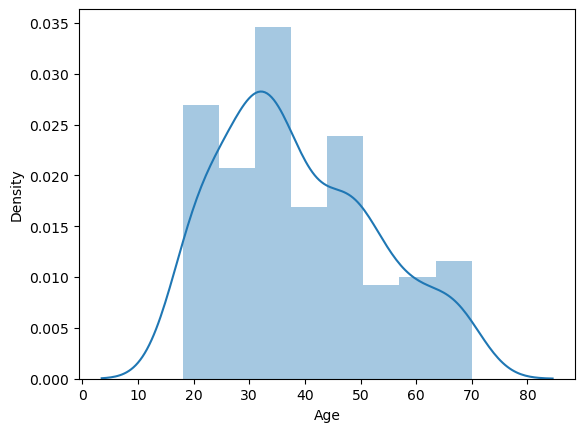

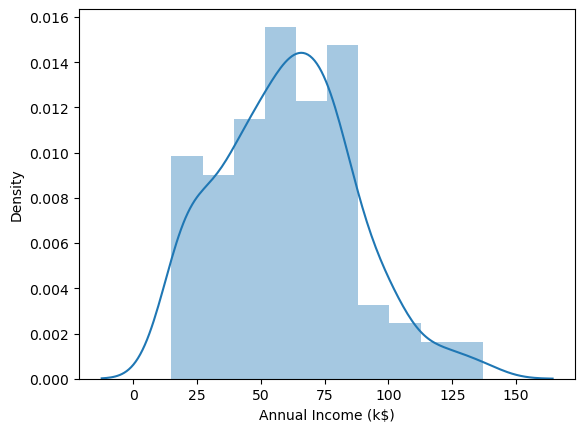

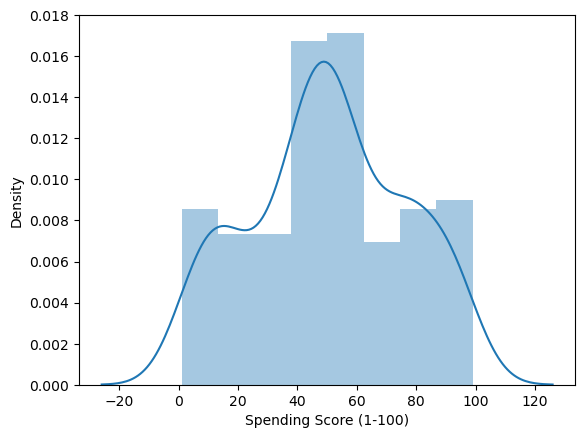

In [7]:
# Ploting distribution plot for each variable/field
columns =['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df_data[i])
# All three variables has almost normal distribution

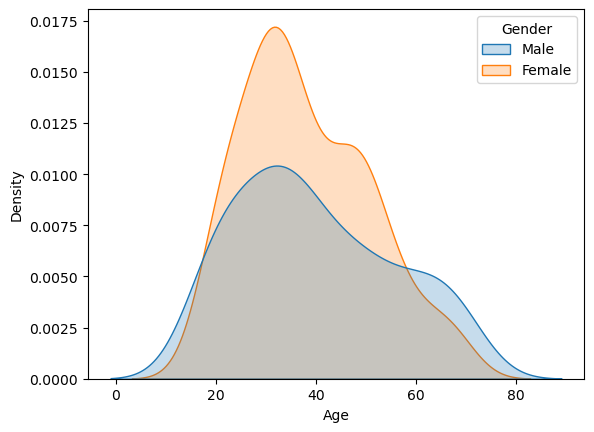

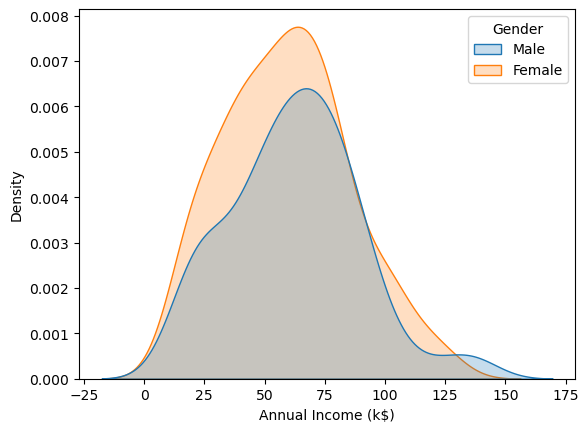

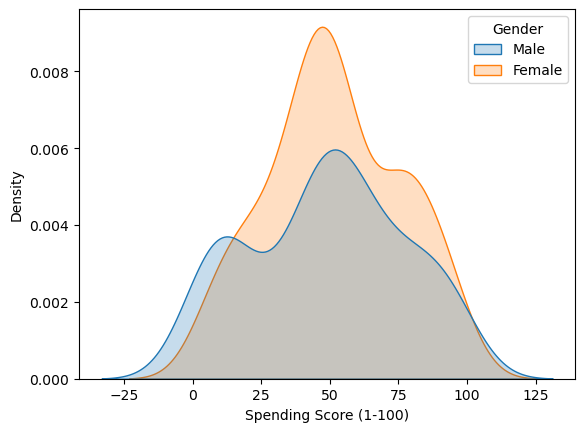

In [8]:
# Plotting Kernel density Estimation plot and compairing it for Men & Women
columns =['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df_data[i],shade = True , hue = df_data['Gender'])
# Age plot of Men and women are almost similar but frequency of women is more
# Annual income plot of men and women are also similar but for men it is little skewed on right
# this can be due to presence of outlier in data
# Spending plot for men and women are almost same

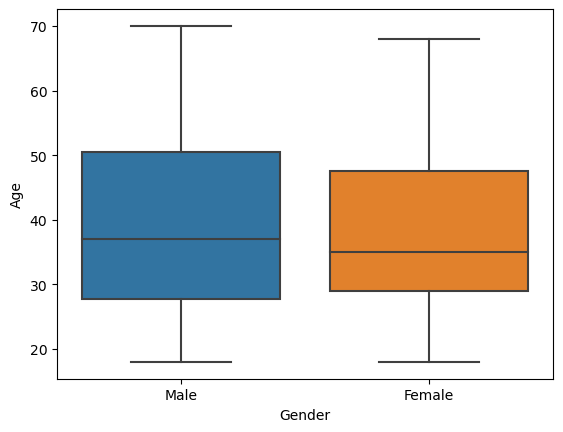

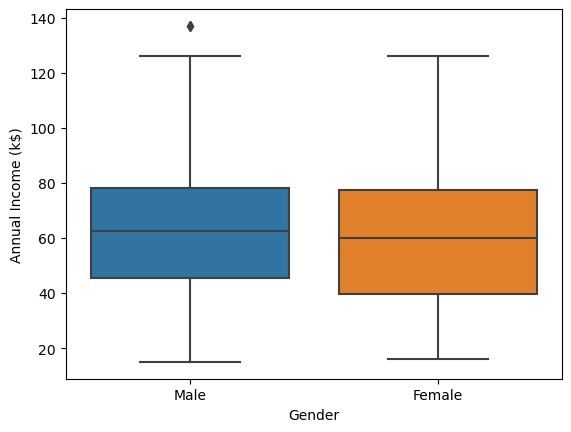

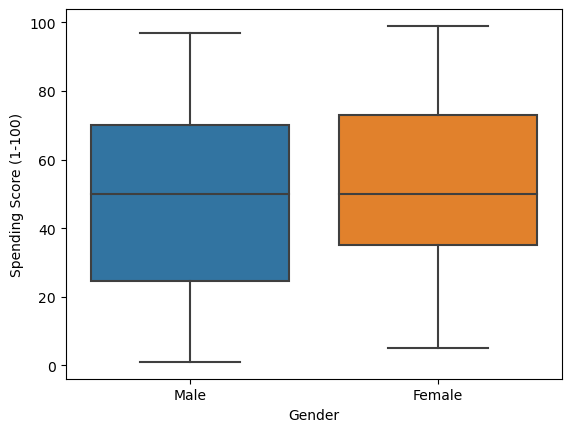

In [9]:
# Plotting box plot to check for outliers
columns =['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df_data, x= df_data['Gender'], y= df_data[i])
# Annual income in male contains outlier

In [10]:
df_data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [11]:
df_data["Gender"].value_counts(normalize = True)
# female share is slightly higher then that of male

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## <font color ="blue"> BIVARIATE ANALYSIS </font>

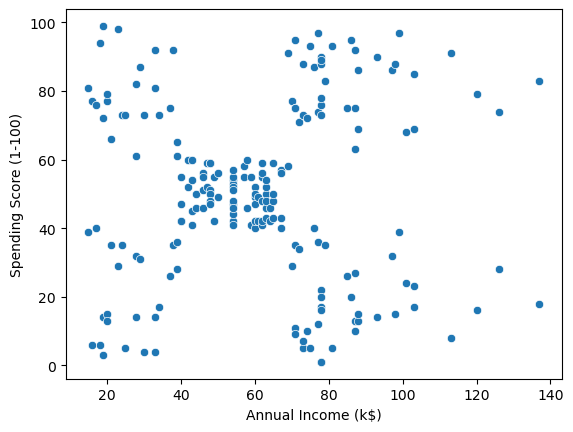

In [12]:
# Plotting scatter plot for two variables
sns.scatterplot(data = df_data , x= "Annual Income (k$)", y = "Spending Score (1-100)");

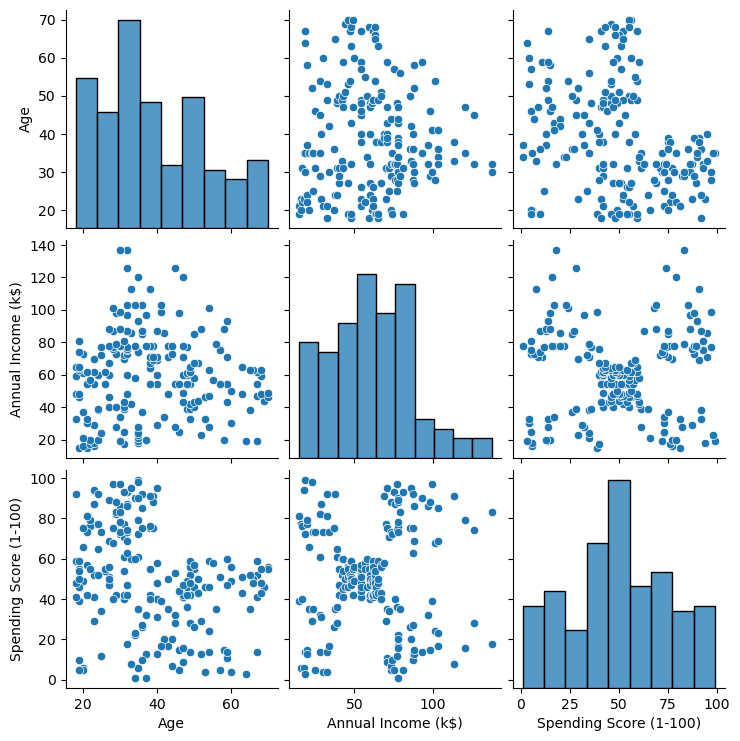

In [13]:
# Creating pair plot to see relationship between variables in the dataset
df = df_data.drop("CustomerID", axis =1)
sns.pairplot(df);
# From Spending score and Annual income pair plot it seems we can create clusters/segments

In [14]:
df.groupby('Gender')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


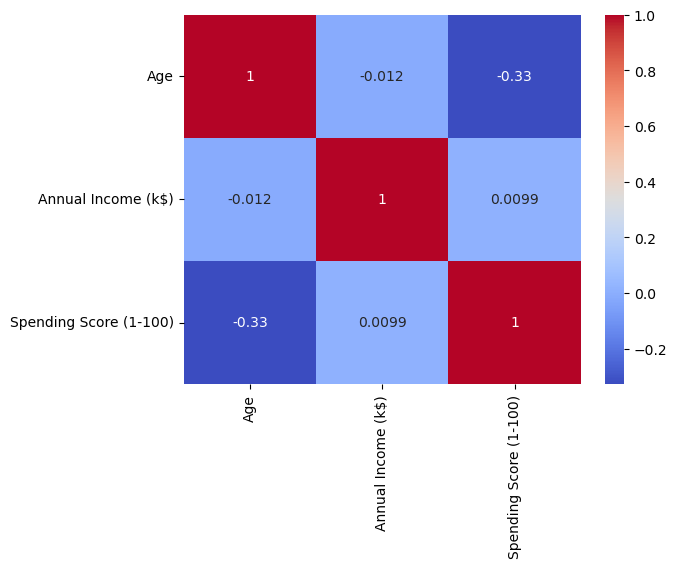

In [15]:
# Checking the correlation between variables
sns.heatmap(df.corr(),annot = True, cmap = "coolwarm");
# Spending Score and Age shows slightly negative correlation 

## <font color = "blue"> CLUSTERING: UNIVARIATE, BIVARIATE</font>

In [16]:
clustering1 = KMeans(n_clusters = 3)
# taking optimum value of n by using elbow method of interia value which is done later

In [17]:
clustering1.fit(df[["Annual Income (k$)"]])

KMeans(n_clusters=3)

In [18]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [19]:
df["Income Cluster"] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [20]:
df["Income Cluster"].value_counts()

0    92
2    72
1    36
Name: Income Cluster, dtype: int64

In [21]:
# finding optimum value of cluster using intertia value and elbow method
inertia_score = []
for i in range(1,12):
    kmeans= KMeans(n_clusters = i)
    kmeans.fit(df[["Annual Income (k$)"]])
    inertia_score.append(kmeans.inertia_)

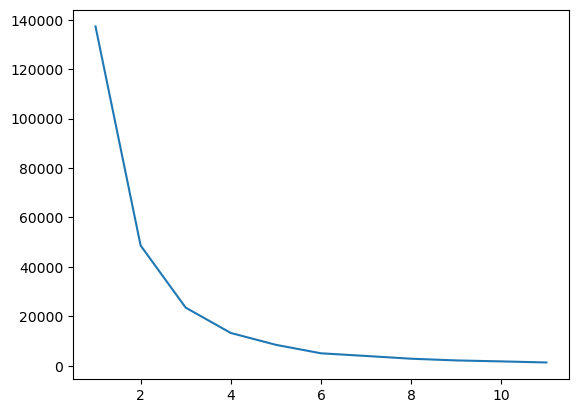

In [22]:
plt.plot(range(1,12),inertia_score)
# from figure elbow seems to start from n = 3, so optimum number of clusters will be 3

In [23]:
df["Income Cluster"] = clustering1.labels_

In [24]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [25]:
df.groupby("Income Cluster")['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.184783,66.717391,50.054348
1,37.833333,99.888889,50.638889
2,38.930556,33.027778,50.166667


## BIVARIATE

In [26]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,2
1,Male,21,15,81,2,0
2,Female,20,16,6,2,2
3,Female,23,16,77,2,0
4,Female,31,17,40,2,2


In [27]:
# finding optimum value of cluster using intertia value and elbow method
inertia_score2 = []
for i in range(1,12):
    kmeans= KMeans(n_clusters = i)
    kmeans.fit(df[["Annual Income (k$)",'Spending Score (1-100)']])
    inertia_score2.append(kmeans.inertia_)

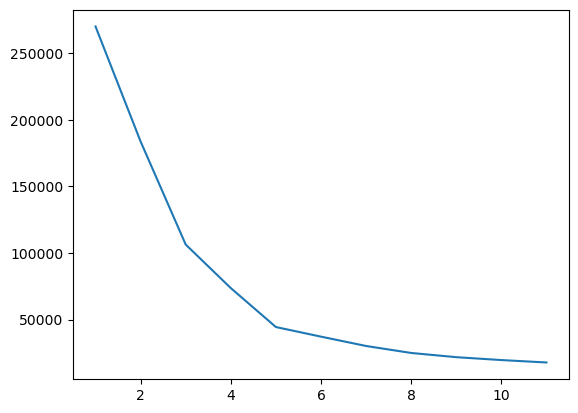

In [28]:
plt.plot(range(1,12),inertia_score2)
# from figure elbow seems to start from n = 5, so optimum number of clusters will be 5

In [29]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ["x", "y"]

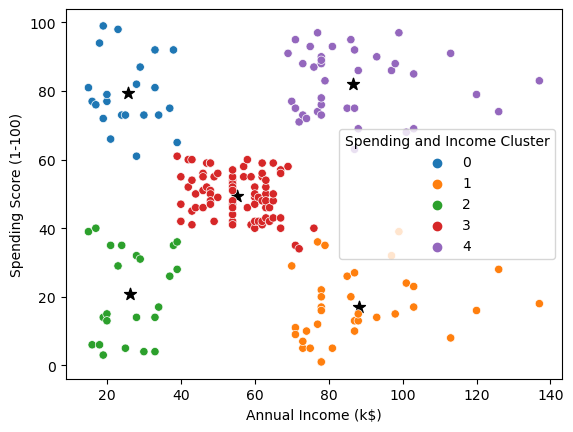

In [34]:
plt.scatter(x= centers["x"], y=centers["y"],s= 80, c= "black", marker="*")
sns.scatterplot(data = df, x = "Annual Income (k$)", y ="Spending Score (1-100)", hue = "Spending and Income Cluster",palette="tab10");
plt.savefig("Customer_clusters.png")

In [31]:
pd.crosstab(df["Spending and Income Cluster"],df['Gender'],normalize="index")

Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.457143,0.542857
2,0.608696,0.391304
3,0.592593,0.407407
4,0.538462,0.461538


In [32]:
df.groupby("Spending and Income Cluster")["Age","Annual Income (k$)","Spending Score (1-100)"].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,41.114286,88.200000,17.114286
2,45.217391,26.304348,20.913043
3,42.716049,55.296296,49.518519
4,32.692308,86.538462,82.128205


## <font color = "blue"> Insights: - </font>

In [33]:
"""Number of Clusters: 05
Cluster Characteristics:
Cluster 0: Low Annual Income, High Spending Score
Cluster 1: High Annual Income, Low Spending Score
Cluster 2: Low Annual Income, low Spending Score 
Cluster 3: Moderate Annual Income, Moderate Spending Score
Cluster 4: High Annual Income, High Spending Score
Insights & Recommendations:
Cluster 4 represents high income customers who are willing to spend,
personalized and premium services can be offerred to retain this customers.
Cluster 2 represents customers with low income and low spending scores.
They might be price-sensitive customers, so offering discounts or cost-effective products/services could attract them.
Cluster 1 represents customers with high income but they are not spending propotionatly,
so they should be targeted with sublte marketing stratagies to influence them to spend more.
Cluster 0 is a interesting group which have low income but a very high spending score
moreover this segment constitutes around 60% women of average age of 25 so products with high brand recognition should be marketed to them.
Cluster 3 represents customers with moderate income and moderate spending scores.
This segment may have potential for growth, so targeted marketing campaigns could be effective in increasing their spending.
"""
    

'Number of Clusters: 05\nCluster Characteristics:\nCluster 0: High Annual Income, High Spending Score\nCluster 1: Low Annual Income, Low Spending Score\nCluster 2: High Annual Income, low Spending Score \nCluster 3: Low Annual Income, High Spending Score\nCluster 4: Average Annual Income, Average Spending Score\nInsights & Recommendations:\nCluster 0 represents high income customers who are willing to spend,\npersonalized and premium services can be offerred to retain this customers.\nCluster 1 represents customers with low income and low spending scores.\nThey might be price-sensitive customers, so offering discounts or cost-effective products/services could attract them.\nCluster 2 represents customers with high income but they are not spending propotionatly,\nso they should be targeted with sublte marketing stratagies to influence them to spend more.\nCluster 3 is a interesting group which have low income but a very high spending score\nmoreover this segment constitutes around 60% w